In [2]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn

In [3]:
# Generate some test data
p = pn.PointData()
p['x'] = np.linspace(0, 1, 100)
p['y'] = np.random.rand(100)
p['a'] = p['x'] ** 2 * p['y']

In [4]:
p['a']

PointDataDim(a : [0.00000000e+00 2.54682434e-05 3.23476455e-04 6.56951920e-04
 6.73178773e-04 1.35602342e-03 2.21995706e-03 3.80789582e-03
 2.60099283e-03 5.04629876e-03 8.65996852e-03 6.14077321e-03
 5.98117022e-03 4.71635589e-03 1.05675813e-02 1.66319922e-03
 1.03012564e-03 1.08235611e-02 5.39917806e-03 1.44308841e-03
 1.16875960e-02 3.20601670e-02 3.02348095e-02 3.35325629e-03
 4.45726907e-02 1.82315323e-02 4.15271527e-02 1.07964093e-02
 1.63508114e-02 3.92146667e-02 5.89141508e-02 8.00108018e-03
 9.55391076e-02 9.43973212e-02 7.98483023e-02 3.14067270e-03
 7.68166416e-02 7.76144101e-02 5.86407521e-02 9.72145180e-02
 1.52910066e-01 6.72815305e-02 1.17142406e-01 1.77797383e-01
 1.62633800e-01 5.97008112e-02 1.80689351e-01 6.11171143e-02
 6.45959492e-03 1.13232174e-01 2.54061016e-01 2.21263890e-01
 1.19588052e-01 5.23756096e-02 1.86060597e-01 1.95828626e-01
 3.15843337e-01 2.81470419e-01 2.04484541e-01 1.44342259e-01
 2.34244160e-01 1.52516315e-01 1.88403216e-01 3.73601825e-01
 1.6387

In [5]:
np.array(p['a'])

array([0.00000000e+00, 2.54682434e-05, 3.23476455e-04, 6.56951920e-04,
       6.73178773e-04, 1.35602342e-03, 2.21995706e-03, 3.80789582e-03,
       2.60099283e-03, 5.04629876e-03, 8.65996852e-03, 6.14077321e-03,
       5.98117022e-03, 4.71635589e-03, 1.05675813e-02, 1.66319922e-03,
       1.03012564e-03, 1.08235611e-02, 5.39917806e-03, 1.44308841e-03,
       1.16875960e-02, 3.20601670e-02, 3.02348095e-02, 3.35325629e-03,
       4.45726907e-02, 1.82315323e-02, 4.15271527e-02, 1.07964093e-02,
       1.63508114e-02, 3.92146667e-02, 5.89141508e-02, 8.00108018e-03,
       9.55391076e-02, 9.43973212e-02, 7.98483023e-02, 3.14067270e-03,
       7.68166416e-02, 7.76144101e-02, 5.86407521e-02, 9.72145180e-02,
       1.52910066e-01, 6.72815305e-02, 1.17142406e-01, 1.77797383e-01,
       1.62633800e-01, 5.97008112e-02, 1.80689351e-01, 6.11171143e-02,
       6.45959492e-03, 1.13232174e-01, 2.54061016e-01, 2.21263890e-01,
       1.19588052e-01, 5.23756096e-02, 1.86060597e-01, 1.95828626e-01,
      

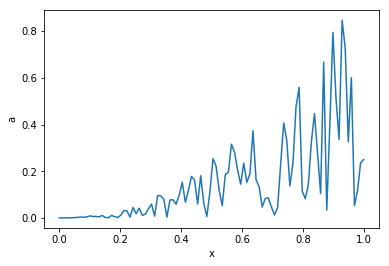

In [6]:
# let's make a simple plot
p.plot('x', 'a')

In [7]:
p2 = pn.PointData(x=np.random.rand(100))
#p2['x'] = np.random.rand(200)

In [8]:
p2

PointData(OrderedDict([('x', array([0.80124458, 0.85605324, 0.12748769, 0.09772061, 0.6182431 ,
       0.8092799 , 0.12912753, 0.61225744, 0.98195899, 0.58889005,
       0.54964531, 0.79778196, 0.13433754, 0.32711319, 0.2128326 ,
       0.12804353, 0.97307927, 0.11549157, 0.73042849, 0.26982411,
       0.55767428, 0.8643426 , 0.6357519 , 0.47195042, 0.9986803 ,
       0.73496816, 0.01671894, 0.84174109, 0.59069158, 0.65916997,
       0.43278244, 0.06650606, 0.01741607, 0.65056924, 0.08796795,
       0.82244913, 0.78931974, 0.80895496, 0.36537924, 0.19665802,
       0.53037479, 0.51221069, 0.18532626, 0.70463167, 0.00602974,
       0.68891756, 0.63893422, 0.36174131, 0.62002547, 0.61217223,
       0.0962977 , 0.49417077, 0.22108408, 0.55558008, 0.58554956,
       0.52227044, 0.18278374, 0.87489469, 0.82558574, 0.4249799 ,
       0.46463287, 0.64817539, 0.98854627, 0.06374186, 0.18398322,
       0.91424105, 0.57435617, 0.10925677, 0.13058382, 0.26688054,
       0.27874565, 0.17834953, 0.

In [17]:
#p2.plot()
#p2['a'] = p.interpolate('a', method='linear')#(p2).plot('x', 'a', '.')
p2 = p.interp(pn.PointData(x=np.random.rand(100)), method='linear')#.plot('x', 'a', '.')

In [18]:
type(p2)

pynocular.pointdata.PointData

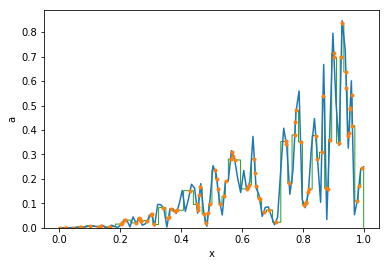

In [22]:
p.plot('x', 'a')
p2.plot('x', 'a', '.')
p2.interp(method='nearest', x=np.linspace(0,1,1000)).plot('a')

In [23]:
p.interp(p2)

PointData(OrderedDict([('x', array([0.0213029 , 0.21648491, 0.77826021, 0.88783223, 0.57629162,
       0.61534835, 0.86226313, 0.20379985, 0.16372934, 0.34155791,
       0.90247869, 0.0021662 , 0.35905275, 0.86639512, 0.94826987,
       0.64605496, 0.01781036, 0.65775186, 0.56700795, 0.20682534,
       0.46337022, 0.49014325, 0.30337995, 0.54110848, 0.95549114,
       0.10212485, 0.64079675, 0.13548275, 0.0213279 , 0.5213859 ,
       0.75528545, 0.96298131, 0.26163908, 0.65847578, 0.92637341,
       0.84827156, 0.91862059, 0.26413664, 0.87675353, 0.45103241,
       0.54924943, 0.81187241, 0.71037557, 0.20496414, 0.67141685,
       0.45576013, 0.81109065, 0.56273913, 0.79262844, 0.81904872,
       0.45654549, 0.29973104, 0.62303537, 0.26708009, 0.46060245,
       0.90188666, 0.35870369, 0.69018422, 0.8183882 , 0.98449441,
       0.74454399, 0.97853903, 0.8425713 , 0.74582055, 0.26089802,
       0.57210044, 0.5286566 , 0.2654816 , 0.28859195, 0.77600534,
       0.99564507, 0.43003082, 0.

get item 0
get item 0


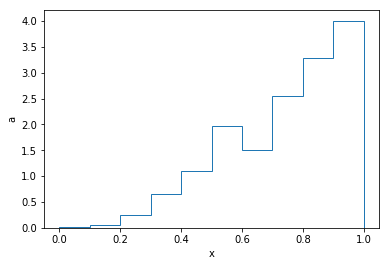

In [24]:
# Generate a histogram function for histograms with weight 'a'
g = p.histogram('x').plot('a')

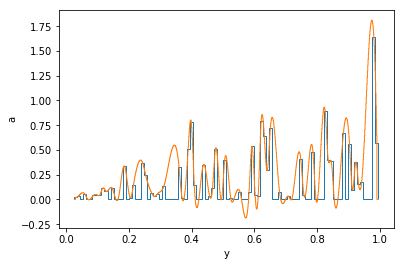

In [25]:
p.histogram(y=100).plot('a')
p.binwise(y=100, function=np.sum, fill_value=np.nan).interp(y=1000, method='cubic').plot('a')

get item 0
get item 0


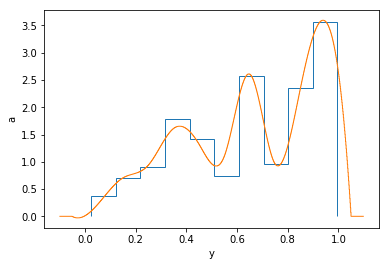

In [30]:
p.histogram('y').plot('a')
p.binwise(y=np.linspace(-0.1,1.1,13)).interp(y=1000).plot('a')

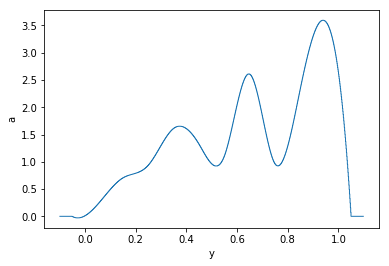

In [34]:
p.binwise(y=np.linspace(-0.1,1.1,13)).interp(y=1000, method='cubic').plot('a')

In [36]:
g = p.histogram(x=10)

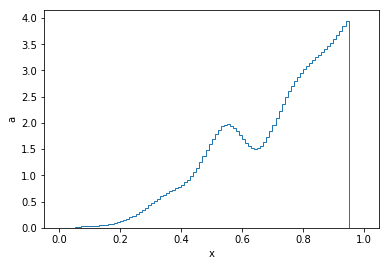

In [38]:
g.interp(x=100).plot('a')

In [39]:
g.interp(x=100)

GridData(Grid(
Dimension("x",
points = None,
edges = array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ]))
nbins = 100),)
OrderedDict([('y', array([       nan,        nan,        nan,        nan,        nan,
       5.65970156, 5.16603651, 4.73697142, 4.36912365, 4.05911053,
       3.80354939, 3.59905758, 3.44225242, 3.32975125, 3.25817141,
       3.22413024, 3.22424507, 3.2

In [40]:
pn.interp(g, x=100)

GridData(Grid(
Dimension("x",
points = None,
edges = array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ]))
nbins = 100),)
OrderedDict([('y', array([       nan,        nan,        nan,        nan,        nan,
       5.65970156, 5.16603651, 4.73697142, 4.36912365, 4.05911053,
       3.80354939, 3.59905758, 3.44225242, 3.32975125, 3.25817141,
       3.22413024, 3.22424507, 3.2

In [ ]:
pn.interpolate_fun

In [ ]:
p.histogram(x=10).grid

In [ ]:
# or in one line
p.histogram('a')('x').plot()

In [ ]:
# we can also evaluate the histogram in different dimensions
p.histogram('a')('x', 'y').plot(cbar=True)

In [ ]:


# we can also evaluate the histogram in different dimensions
g = p.histogram('a')('x').plot()
g = p.histogram('a')('x').resample('a')(x=13)
p.histogram('a')('x').resample('a')(x=3).plot()


In [ ]:
g['a']

In [ ]:
f = p.histogram('a')('x').resample('a')

In [ ]:
f(f(x=8)).plot()

In [ ]:
# or the function from before in a different binnig
f(x=30).plot()

In [ ]:
# a histogram with no weights, evaluated in y
p.histogram()(y=np.linspace(0,1,33)).plot()

In [ ]:
# the returned object is a GridData type
g = p.histogram('a')(x=20)

In [ ]:
# it has a grid defined
g

In [ ]:
# this evaluates the function from earlier on g
f(g).plot()

In [ ]:
g

In [ ]:
# or assign it a new variable which will automatically evaluate (looks a bit abstract)
g['blah'] = f(g)
g.plot('blah')

In [ ]:
f(g)

In [ ]:
g

In [ ]:
g.lookup('blah')(p).plot('x', 'blah')#'x', 'blah')
g.resample('blah')(x=3).plot()#'x', 'blah')

In [ ]:
#p['blah'] = 

p2 = g.lookup('blah')(p)

In [ ]:
p2 = pn.PointData()
p2['x'] = np.linspace(0,1,33)

In [ ]:
p2['blah'] = g.lookup('blah')(p2)

In [ ]:
p2['f'] = g.lookup('blah')(p2)

In [ ]:
p2

In [ ]:
p.plot('x', 'y')

In [ ]:
p.data

In [ ]:
# or again all together
g['blah'] = p.histogram('a')(g)
g.plot('blah')

In [ ]:
p.binwise('a', method='mean')('x', y=20)['a']#.plot()

In [ ]:
p.binwise('a', method='mean')('x', y=20).plot()

In [ ]:
p.binwise('a', function=lambda x : np.percentile(x,50))('x', y=20)['a']

In [ ]:
g = pn.GridData('x','y')

In [ ]:
g.grid

In [ ]:
g['b'] = p.histogram()(g)

In [ ]:
p.histogram()(g)

In [ ]:
g.grid

In [ ]:
g.plot(cbar=True)

In [ ]:
g['x']

In [ ]:
g['c'] = p[p['x'] < 0.5].histogram()(g)
g.plot('c')

In [ ]:
grid = pn.grid.Grid(x=[0., 0.5,np.inf], y=10)

In [ ]:
p.binwise('a', method='mean')(grid).histogram('a')('x').plot()

In [ ]:
p[p['x'] < 1].histogram()

In [ ]:
# let's go a bit crazy....what's f(f(x))?
# it's the same as f(x) here because we already histogrammed

In [ ]:
f(f('x')).plot()

In [ ]:
# or first histogram it in x and y and then only x.....again the same
f('x').histogram('a')('x').plot()

In [ ]:
p.vars

In [ ]:
g = f(x=100)

In [ ]:
g.plot('a')

In [ ]:
g.grid.point_meshgrid

In [ ]:
g.interpolate('a', method='cubic')(x=100).plot()

In [ ]:
np.concatenate([[1,2,3], [3,4]])

In [ ]:
a = {'x':2}

In [ ]:
a.update({'y':7})

In [ ]:
a

In [ ]:
from collections import OrderedDict

In [ ]:
a = OrderedDict({'x':2})


In [ ]:
a

In [ ]:
a.update({'y':7})

In [ ]:
a

In [ ]:
a.update({'x':23})

In [ ]:
a

In [ ]:
a['k'] = a.pop('y')

In [ ]:
a

In [ ]:
a = np.arange(24).reshape(4,3,2)

In [ ]:
a

In [ ]:
a.reshape(-1, *a.shape[2:])[0] +=1

In [ ]:
a

In [ ]:
p2['b'] = np.arange(len(p2)*2).reshape(-1,2)

In [ ]:
#p2.histogram('b')('x')

In [ ]:
list(range(10))[2:]

In [ ]:
isinstance(3., float)

In [ ]:
g.grid
#

In [ ]:
g.resample('a')(x=0.5).grid

In [ ]:
g.resample('a')(x=0.5).plot()
g.resample('a')(x=0.03).plot()
g.resample('a')(x=0.01).plot()

In [ ]:
import matplotlib.image as mpimg

img=mpimg.imread('on-fire.jpeg')

img1d = np.average(img, axis=-1)

In [ ]:
img1d.shape

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(img1d)

In [ ]:
g = pn.GridData()#x=np.arange(1281), y=np.arange(723))

In [ ]:
g['img'] = img1d.T[:,::-1]

In [ ]:
g.plot('img', cmap='gray')

In [ ]:
#gs = g.resample('img')(x=0.1, y=0.1)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
f = g.binwise('img', method='mean')
f('x').plot(ax=ax[0])
f('y').plot(ax=ax[1])

In [ ]:
N = 300
pd = pn.PointData(x=np.random.rand(N)*1280, y=np.random.rand(N)*722)

In [ ]:
pd['img'] = g.lookup('img')(pd)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
f = pd.binwise('img', method='mean')
f(x=20).plot(ax=ax[0])
f('y').plot(ax=ax[1])

In [ ]:
pd

In [ ]:
pd['img']

In [ ]:
pd.plot_scatter('x', 'y', 'img', s=0.1)

In [ ]:
pd.interpolate('img', method='nearest')(g).plot(cmap='jet')

In [ ]:
pd.interpolate('img', method='nearest')(g).binwise('img', method='mean')('y').plot()